# Fruit classification

## Apple, Banana, Orange

## Train, Valid, Test

## ~70%/15%/15%

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

2023-10-18 22:18:17.342394: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1, Training
## Define base model

Input shape 64x64x3, dense, dense, dense

In [11]:
num_classes = 8

model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(512, activation='relu', input_shape=(64,)),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 12288)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               6291968   
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 8)                 4104      
                                                                 
Total params: 6,558,728
Trainable params: 6,558,728
Non-trainable params: 0
_________________________________________________________________


## Define train/valid directory and images (64x64)

In [3]:
TRAINING_DIR = "data/fruitdata/train"
train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(64, 64))

VALIDATION_DIR = "data/fruitdata/valid"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(64, 64)) 

Found 905 images belonging to 8 classes.
Found 146 images belonging to 8 classes.


## Train and save the model

In [12]:
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)
model.save("fruit_2.h5")

Epoch 1/5


2023-10-18 22:32:25.985234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/91 [==>...........................] - ETA: 15s - loss: 12.8261 - acc: 0.1545

/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


91/91 [==============================] - ETA: 0s - loss: 4.1969 - acc: 0.3061

2023-10-18 22:32:48.953954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


91/91 [==============================] - 27s 283ms/step - loss: 4.1969 - acc: 0.3061 - val_loss: 1.8325 - val_acc: 0.3082
Epoch 2/5
91/91 [==============================] - 30s 326ms/step - loss: 1.4797 - acc: 0.4586 - val_loss: 1.3305 - val_acc: 0.4932
Epoch 3/5
91/91 [==============================] - 24s 267ms/step - loss: 1.3380 - acc: 0.5304 - val_loss: 0.9181 - val_acc: 0.7740
Epoch 4/5
91/91 [==============================] - 24s 260ms/step - loss: 1.2470 - acc: 0.5646 - val_loss: 0.7754 - val_acc: 0.7603
Epoch 5/5
91/91 [==============================] - 24s 260ms/step - loss: 1.1134 - acc: 0.6155 - val_loss: 1.1516 - val_acc: 0.5959


## See the training accuracy/loss

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


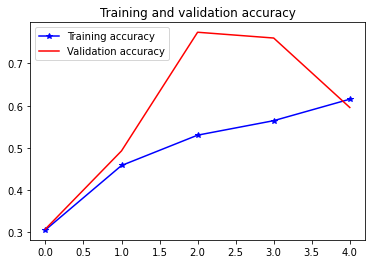

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print(history.history.keys())
epochs=5

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
acc = history.history['acc']
loss = history.history['loss']

plt.plot(range(epochs), acc, 'b*-', label = 'Training accuracy')
plt.plot(range(epochs), val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

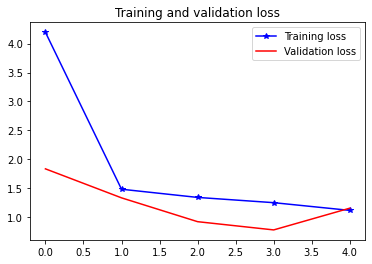

In [14]:
plt.plot(range(epochs), loss, 'b*-', label = 'Training loss')
plt.plot(range(epochs), val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

# 2, Inference

## First, load the trained model, then image to predict

1/1 [==============================] - 0s 72ms/step


array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0758146e-15, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

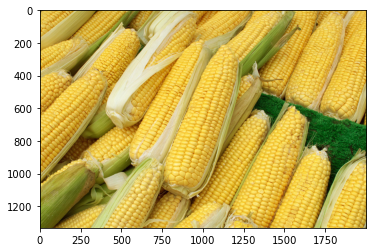

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow import keras

model = keras.models.load_model('fruit_2.h5')

image_path = 'data/fruitdata/test/Corn/Image_1.jpg'

image = mpimg.imread(image_path)
plt.imshow(image)

def make_prediction(image_path):
    image = image_utils.load_img(image_path, target_size=(64, 64))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,64,64,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

make_prediction('data/fruitdata/test/Corn/Image_1.jpg')

## It's better to define the mapping for index/name

In [27]:
import numpy as np

image_mapping = {0: 'Apple', 1: 'Banana', 2: 'Orange', 3: 'Corn', 4: 'Potato', 5: 'Tomato', 6: 'Mango', 7: 'Pineapple'}
    
print(image_mapping[np.argmax(make_prediction('data/fruitdata/test/Tomato/Image_1.jpg'))])

1/1 [==============================] - 0s 24ms/step
Tomato


## Run the model inference for "test" dataset

In [28]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_it = test_datagen.flow_from_directory('data/fruitdata/test/', 
                                       target_size=(64, 64), 
                                       batch_size=1, 
                                       shuffle=False,
                                       class_mode="categorical")

pred_output = model.predict(test_it)
print(pred_output)
pred_output = np.argmax(pred_output, axis=1)
print(pred_output)

Found 146 images belonging to 8 classes.
  1/146 [..............................] - ETA: 23s

2023-10-18 22:40:02.661172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


146/146 [==============================] - 3s 23ms/step
[[9.82649922e-01 3.03635583e-03 2.34537310e-05 ... 1.13909286e-04
  3.65295145e-03 1.24491286e-03]
 [9.64637041e-01 2.57718423e-03 2.12539344e-05 ... 1.12593611e-04
  4.27562417e-03 1.73667446e-03]
 [6.25263989e-01 1.45574156e-02 9.50847534e-05 ... 2.14692147e-04
  5.00668352e-03 3.57282837e-03]
 ...
 [5.48102595e-02 9.71287489e-02 2.97713000e-03 ... 3.26874643e-03
  4.33954671e-02 1.16636686e-01]
 [1.96735673e-02 7.32261240e-01 1.27567118e-02 ... 2.07671270e-01
  1.87838860e-02 5.40151866e-03]
 [5.16678467e-02 3.45697135e-01 1.14827126e-01 ... 1.23844512e-01
  7.59900361e-02 9.85176638e-02]]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 4 1 1 1 1 1 0 4 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 2 1 1
 2 1 2 1 3 1 3 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4
 1 1 4 4 4 5 1 1 1 1 1 5 1 1 5 1 3 1 1 1 1 1 3 1 1 1 1 1 4 4 1 2 4 1 1]


## See the classification report

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_it.classes, pred_output))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        32
           1       0.41      1.00      0.58        32
           2       0.62      0.50      0.56        10
           3       0.50      0.20      0.29        10
           4       0.85      0.91      0.88        32
           5       1.00      0.30      0.46        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10

    accuracy                           0.61       146
   macro avg       0.55      0.43      0.43       146
weighted avg       0.64      0.61      0.57       146



/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## See the confusion matrix

Text(0.5, 1.0, 'Confusion matrix of model')

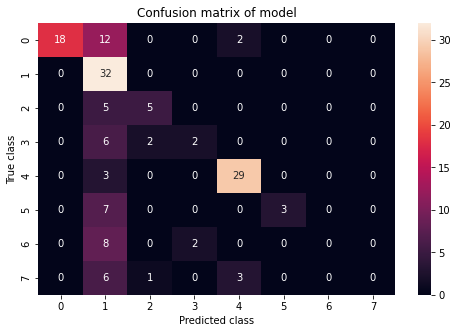

In [30]:
cf_matrix = confusion_matrix(test_it.classes, pred_output)

plt.figure(figsize=(8,5))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')